In [30]:
# Vehicles EDA
# In this notebook we will access the vehicles file and do some EDA to make it more user friendly to the public

import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
vehicles = pd.read_csv('vehicles_us.csv')
# File is loaded to variable

In [32]:
vehicles['price'] = vehicles['price'].astype(float)
vehicles['model_year'] = vehicles['model_year'].astype(float)
vehicles['odometer'] = vehicles['odometer'].astype(float)
vehicles['cylinders'] = vehicles['cylinders'].astype(float)
# converting variables to same type to make calculations easier

In [33]:
print(vehicles.shape)  # Number of rows and columns
print(vehicles.info())  # Data types and non-null counts

(51525, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  float64
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 5.1+ MB
None


In [34]:
print(vehicles.head())

     price  model_year           model  condition  cylinders fuel  odometer  \
0   9400.0      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500.0         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500.0      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500.0      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900.0      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  


In [35]:
print(vehicles.describe(include='all'))

                price    model_year       model  condition     cylinders  \
count    51525.000000  47906.000000       51525      51525  46265.000000   
unique            NaN           NaN         100          6           NaN   
top               NaN           NaN  ford f-150  excellent           NaN   
freq              NaN           NaN        2796      24773           NaN   
mean     12132.464920   2009.750470         NaN        NaN      6.125235   
std      10040.803015      6.282065         NaN        NaN      1.660360   
min          1.000000   1908.000000         NaN        NaN      3.000000   
25%       5000.000000   2006.000000         NaN        NaN      4.000000   
50%       9000.000000   2011.000000         NaN        NaN      6.000000   
75%      16839.000000   2014.000000         NaN        NaN      8.000000   
max     375000.000000   2019.000000         NaN        NaN     12.000000   

         fuel       odometer transmission   type paint_color   is_4wd  \
count   51525 

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


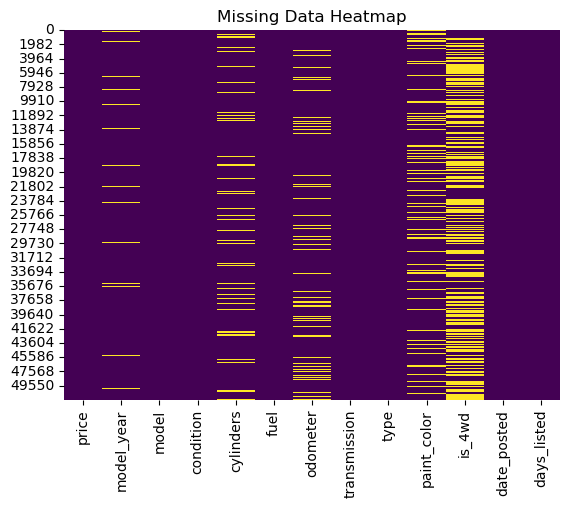

In [36]:
print(vehicles.isnull().sum())
sns.heatmap(vehicles.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [37]:
vehicles['odometer'].fillna(vehicles['odometer'].median(), inplace=True)
vehicles['paint_color'].fillna(vehicles['paint_color'].mode()[0], inplace=True)
# Fill or drop missing values based on context
# For numerical columns, fill missing values with median or mean

/var/folders/nq/b5ktqz1n0p1b9wqyl62p2xw80000gn/T/ipykernel_95277/2147008247.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/nq/b5ktqz1n0p1b9wqyl62p2xw80000gn/T/ipykernel_95277/2147008247.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [38]:
# Restore missing 'model_year' based on median value for each 'model'
vehicles['model_year'] = vehicles['model_year'].fillna(
    vehicles.groupby('model')['model_year'].transform('median')
)

# Restore missing 'odometer' based on median value for each 'model_year'
vehicles['odometer'] = vehicles['odometer'].fillna(
    vehicles.groupby('model_year')['odometer'].transform('median')
)

# Restore missing 'cylinders' based on median value for each 'model'
vehicles['cylinders'] = vehicles['cylinders'].fillna(
    vehicles.groupby('model')['cylinders'].transform('median')
)

# Verify that missing values are handled
print(vehicles.isnull().sum())

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [39]:

# Plot histogram for 'price'
fig_price_hist = px.histogram(vehicles, x='price', nbins=20, title='Distribution of Price')
fig_price_hist.update_layout(xaxis_title='Price', yaxis_title='Frequency')
fig_price_hist.show()

# Plot histogram for 'odometer'
fig_odometer_hist = px.histogram(vehicles, x='odometer', nbins=20, title='Distribution of Odometer')
fig_odometer_hist.update_layout(xaxis_title='Odometer', yaxis_title='Frequency')
fig_odometer_hist.show()

# Plot histogram for 'model_year'
fig_model_year_hist = px.histogram(vehicles, x='model_year', nbins=20, title='Distribution of Model Year')
fig_model_year_hist.update_layout(xaxis_title='Model Year', yaxis_title='Frequency')
fig_model_year_hist.show()

# Plot histogram for 'days_listed'
fig_days_listed_hist = px.histogram(vehicles, x='days_listed', nbins=20, title='Distribution of Days Listed')
fig_days_listed_hist.update_layout(xaxis_title='Days Listed', yaxis_title='Frequency')
fig_days_listed_hist.show()

In [40]:
# Restore missing 'model_year' based on median value for each 'model'
vehicles['model_year'] = vehicles['model_year'].fillna(
    vehicles.groupby('model')['model_year'].transform('median')
)

# Restore missing 'odometer' based on median value for each 'model_year'
vehicles['odometer'] = vehicles['odometer'].fillna(
    vehicles.groupby('model_year')['odometer'].transform('median')
)

# Restore missing 'cylinders' based on median value for each 'model'
vehicles['cylinders'] = vehicles['cylinders'].fillna(
    vehicles.groupby('model')['cylinders'].transform('median')
)

# Verify that missing values are handled
print(vehicles.isnull().sum())

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [41]:
# Calculate the counts of each condition
condition_counts = vehicles['condition'].value_counts()

# Convert Series to DataFrame for Plotly Express
condition_counts_df = condition_counts.reset_index()
condition_counts_df.columns = ['Condition', 'Count']

# Create the bar chart
fig_condition_hist = px.bar(condition_counts_df, x='Condition', y='Count', title='Counts of Condition')

# Update layout for better readability
fig_condition_hist.update_layout(xaxis_title='Condition', yaxis_title='Count')

# Show the bar chart
fig_condition_hist.show()

In [42]:
fuel_counts = vehicles['fuel'].value_counts()
fig_fuel_hist = px.bar(fuel_counts, title='Counts of Fuel Types', labels={'index': 'Fuel Type', 'value': 'Count'})
fig_fuel_hist.update_layout(xaxis_title='Fuel Type', yaxis_title='Count')
fig_fuel_hist.show()

In [43]:
paint_color_counts = vehicles['paint_color'].value_counts()
fig_paint_color_hist = px.bar(paint_color_counts, title='Counts of Paint Colors', labels={'index': 'Paint Color', 'value': 'Count'})
fig_paint_color_hist.update_layout(xaxis_title='Paint Color', yaxis_title='Count')
fig_paint_color_hist.show()

In [44]:
is_4wd_counts = vehicles['is_4wd'].value_counts()
fig_is_4wd_hist = px.bar(is_4wd_counts, title='Counts of 4WD Status', labels={'index': 'Is 4WD', 'value': 'Count'})
fig_is_4wd_hist.update_layout(xaxis_title='Is 4WD', yaxis_title='Count')
fig_is_4wd_hist.show()

The vehicles dataset contains information on 5 vehicles with various attributes including price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, and days_listed. The data reveals that most vehicles are relatively recent models, predominantly in good or like-new condition, and have automatic transmissions and gasoline fuel. Key numerical features like price, model_year, odometer, and cylinders show varied distributions, with price and odometer being right-skewed. Missing values are present in model_year, odometer, paint_color, and is_4wd. For missing data imputation, median values based on vehicle model or model_year are suggested for model_year, odometer, and cylinders, while the most frequent paint_color within each model is recommended. This approach will enhance data completeness and reliability for further analysis.



